In [91]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,train_test_split



In [12]:
heart=pd.read_csv("heart.csv")
print(heart.head())
print(heart.shape)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
(303, 14)


In [8]:
'''age : 나이
sex : 성별(0 : 여성; 1 : 남성)
cp : 가슴통증 유형(0 = 증상 없음 ; 1 = 비전형적 협심증; 2 = 비협심증 통증; 3 = 전형적인 협심증)
trestbps : 평시 혈압
chol : 혈중 콜레스테롤 농도
fbs : 공복시 혈당 > 120mg/dl(0 = False; 1 = True)
restecg : 안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = ST-T파 비정상)
thalach : 최대 심박수
exang : 협심증 유발 운동(0 = no; 1 = yes)
old peak : 비교적 안정되기까지 운동으로 유발되는 ST
slope : 최대 운동 ST segment의 기울기(0 = 하강; 1 = 평면; 2 = 상승)
ca : 형광 투시된 주요 혈관의 수(0~3; 4 = NA)
thal : 0 = NA; 1 = 해결된 결함; 2 = 정상; 3 = 해결가능한 결함
target : 심장병 진단(0 = False; 1 = True)'''

'age : 나이\nsex : 성별(0 : 여성; 1 : 남성)\ncp : 가슴통증 유형(0 = 증상 없음 ; 1 = 비전형적 협심증; 2 = 비협심증 통증; 3 = 전형적인 협심증)\ntrestbps : 평시 혈압\nchol : 혈중 콜레스테롤 농도\nfbs : 공복시 혈당 > 120mg/dl(0 = False; 1 = True)\nrestecg : 안정 심전도 결과(0 = 좌심실 비대; 1 = 정상; 2 = ST-T파 비정상)\nthalach : 최대 심박수\nexang : 협심증 유발 운동(0 = no; 1 = yes)\nold peak : 비교적 안정되기까지 운동으로 유발되는 ST\nslope : 최대 운동 ST segment의 기울기(0 = 하강; 1 = 평면; 2 = 상승)\nca : 형광 투시된 주요 혈관의 수(0~3; 4 = NA)\nthal : 0 = NA; 1 = 해결된 결함; 2 = 정상; 3 = 해결가능한 결함\ntarget : 심장병 진단(0 = False; 1 = True)'

In [17]:
heart.isnull().sum()# null값 없음

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
heart_data=heart.drop("target",axis=1)# feature값만 지정해줌
heart_target=heart["target"]# target값만 지정해줌

In [26]:
#train_test_split으로 나눠서 예측해본다
dt_clf=DecisionTreeClassifier()
x_train,x_test,y_train,y_test=train_test_split(heart_data,heart_target,
                                               test_size=0.3,random_state=121)
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_test)
print("예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

예측 정확도:0.7143


In [27]:
#예측 정확도가 낮아서 test_size를 조정해서 여러번 실행해봄
size=[0.2,0.3,0.4]
case=0
for i in size:
    case+=1
    x_train,x_test,y_train,y_test=train_test_split(heart_data,heart_target,
                                               test_size=i,random_state=121)
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    print("{0}의 예측 정확도:{1:.4f}".format(case,accuracy_score(y_test,pred)))
    
#0.2일 경우가 가장 정확도가 높았지만 대체로 낮은 예측률을 보여줌

1의 예측 정확도:0.7869
2의 예측 정확도:0.7143
3의 예측 정확도:0.7131


교차검증

kfold

In [49]:
heart_data=heart.drop("target",axis=1)# target값만 지정해줌
heart_target=heart["target"]# feature값만 지정해줌
heart_data_array=heart_data.values#array로 바꿔줘야 index로 kfold가능
heart_target_array=heart_target.values
dt_clf=DecisionTreeClassifier(random_state=156)
kfold=KFold(n_splits=3)#303개의 행이여서 3으로 잡음
cv_accuracy=[]
case=0

for train_index,test_index in kfold.split(heart_data_array):
    x_train,x_test=heart_data_array[train_index],heart_data_array[test_index]
    y_train,y_test=heart_target_array[train_index],heart_target_array[test_index]
    
    #학습,예측
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    case+=1
    
    #정확도 출력
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=x_train.shape[0]
    test_size=x_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(case, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(case,test_index))
    cv_accuracy.append(accuracy)
#kfold 평균 정확도 계산
print("\n## 평균 정확도:",np.mean(cv_accuracy))
#평균 정확도가 매우 낮다


#1 교차 검증 정확도 :0.6436, 학습 데이터 크기: 202, 검증 데이터 크기: 101
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]

#2 교차 검증 정확도 :0.7723, 학습 데이터 크기: 202, 검증 데이터 크기: 101
#2 검증 세트 인덱스:[101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201]

#3 교차 검증 정확도 :0.4653, 학습 데이터 크기: 202, 검증 데이

stratified kfold

In [54]:
heart_target.value_counts()
heart_df=heart_data
heart_df["label"]=heart_target
heart_df["label"].value_counts()

1    165
0    138
Name: label, dtype: int64

In [57]:
skf=StratifiedKFold(n_splits=3)
case=0
for train_index,test_index in skf.split(heart_df,heart_df["label"]):
    case+=1
    label_train=heart_df["label"].iloc[train_index]
    label_test=heart_df["label"].iloc[test_index]
    print('## 교차 검증: {0}'.format(case))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    110
0     92
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    55
0    46
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    110
0     92
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    55
0    46
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    110
0     92
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    55
0    46
Name: label, dtype: int64


In [60]:
dt_clf=DecisionTreeClassifier(random_state=156)

skfold=StratifiedKFold(n_splits=3)
case=0
cv_accuracy=[]

for train_index,test_index in skfold.split(heart_data_array,heart_target_array):
    x_train,x_test=heart_data_array[train_index],heart_data_array[test_index]
    y_train,y_test=heart_target_array[train_index],heart_target_array[test_index]
    
    dt_clf.fit(x_train,y_train)
    pred=dt_clf.predict(x_test)
    
    case+=1
    accuracy=np.round(accuracy_score(y_test,pred),4)
    train_size=x_train.shape[0]
    test_size=x_test.shape[0]

    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(case, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(case,test_index))
    cv_accuracy.append(accuracy)
       
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 
    


#1 교차 검증 정확도 :0.7822, 학습 데이터 크기: 202, 검증 데이터 크기: 101
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210]

#2 교차 검증 정확도 :0.7129, 학습 데이터 크기: 202, 검증 데이터 크기: 101
#2 검증 세트 인덱스:[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256]

#3 교차 검증 정확도 :0.6832, 학습 데이터 크기: 202, 검증 데이

GridSearchCv

In [77]:
x_train,x_test,y_train,y_test=train_test_split(heart_data_array,heart_target_array,
                                              test_size=0.2,random_state=156)
dtree=DecisionTreeClassifier()
parameters={"max_depth":[1,2,3],"min_samples_split":[2,3]}

In [78]:
grid_dtree=GridSearchCV(dtree,param_grid=parameters,cv=3,refit=True,return_train_score=True)
grid_dtree.fit(x_train,y_train)
scores_df=pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.756327,3,0.740741,0.740741,0.7875
1,"{'max_depth': 1, 'min_samples_split': 3}",0.756327,3,0.740741,0.740741,0.7875
2,"{'max_depth': 2, 'min_samples_split': 2}",0.731379,5,0.740741,0.728395,0.7250
3,"{'max_depth': 2, 'min_samples_split': 3}",0.731379,5,0.740741,0.728395,0.7250
4,"{'max_depth': 3, 'min_samples_split': 2}",0.776698,2,0.802469,0.790123,0.7375
5,"{'max_depth': 3, 'min_samples_split': 3}",0.789198,1,0.802469,0.790123,0.7750


In [79]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))
 
pred = grid_dtree.predict(x_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 3}
GridSearchCV 최고 정확도: 0.7892
테스트 데이터 세트 정확도: 0.8197


In [80]:
estimator=grid_dtree.best_estimator_
pred=estimator.predict(x_test)
print("테스트 데이터 세트 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.8197


정확도

In [87]:
x_train,x_test,y_train,y_test=train_test_split(heart_data,heart_target,
                                               test_size=0.3,random_state=121)

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)
fakeclf=MyFakeClassifier()
fakeclf.fit(x_train,y_train)
fakepred=fakeclf.predict(x_test)
print("전체 target의 분포도:")
print(heart_target.value_counts())
print("모든 예측을 0으로 하여도 정확도는:{:.3f}".format(accuracy_score(y_test,fakepred)))

전체 target의 분포도:
1    165
0    138
Name: target, dtype: int64
모든 예측을 0으로 하여도 정확도는:0.495


In [88]:
confusion_matrix(y_test,fakepred)

array([[45,  0],
       [46,  0]], dtype=int64)

precision,recall

In [92]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [94]:
x_train, x_test, y_train, y_test = train_test_split(heart_data, heart_target, 
                                                    test_size=0.3, random_state=11)
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)
pred=lr_clf.predict(x_test)
get_clf_eval(y_test,pred)

오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811


C:\Users\sunyong\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


precision/recall trade-off

In [95]:
pred_proba=lr_clf.predict_proba(x_test)
pred=lr_clf.predict(x_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


pred_proba()결과 Shape : (91, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.97812023 0.02187977]
 [0.02892507 0.97107493]
 [0.81266656 0.18733344]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.97812023 0.02187977 0.        ]
 [0.02892507 0.97107493 1.        ]
 [0.81266656 0.18733344 0.        ]]


In [102]:
from sklearn.preprocessing import Binarizer

custom_threshold=0.5

pred_proba_1=pred_proba[:,1].reshape(-1,1)

binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict=binarizer.transform(pred_proba_1)
get_clf_eval(y_test,custom_predict)

오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811


In [104]:
thresholds=[0.4,0.45,0.5,0.55,0.60]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    for custom_threshold in thresholds:
        binarizer=Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict=binarizer.transform(pred_proba_c1)
        print("임곗값:",custom_threshold)
        get_clf_eval(y_test,custom_predict)
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임곗값: 0.4
오차 행렬
[[38  0]
 [ 0 53]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000
임곗값: 0.45
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811
임곗값: 0.5
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811
임곗값: 0.55
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811
임곗값: 0.6
오차 행렬
[[38  0]
 [ 2 51]]
정확도: 0.9780, 정밀도: 1.0000, 재현율: 0.9623


In [110]:
pred_proba_class1=lr_clf.predict_proba(x_test)[:,1]
precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임계값 배열의 index 11개:', thr_index)
print('샘플용 11개의 임곗값: ', np.round(thresholds[thr_index], 2))

print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (53,)
반환된 precisions 배열의 Shape: (54,)
반환된 recalls 배열의 Shape: (54,)
thresholds 5 sample: [0.42868688 0.55947094 0.66800232 0.67001183 0.67482638]
precisions 5 sample: [1. 1. 1. 1. 1.]
recalls 5 sample: [1.         0.98113208 0.96226415 0.94339623 0.9245283 ]
샘플 추출을 위한 임계값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50]
샘플용 10개의 임곗값:  [0.43 0.81 0.92 0.95 0.95 0.97 0.97 0.98 0.99 0.99 1.  ]
샘플 임계값별 정밀도:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
샘플 임계값별 재현율:  [1.    0.906 0.811 0.717 0.623 0.528 0.434 0.34  0.245 0.151 0.057]


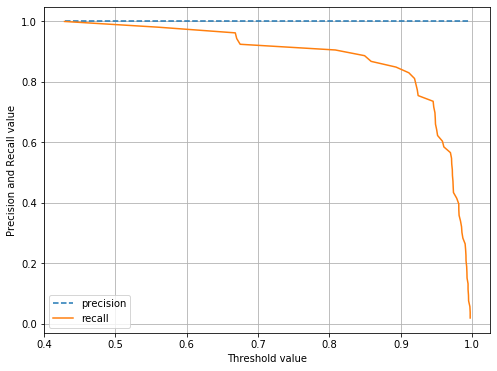

In [113]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precisions,recalls,thresholds=precision_recall_curve(y_test,pred_proba_c1)
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(x_test)[:, 1] )

f1_score

In [115]:
f1=f1_score(y_test,pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.9905


In [117]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[38  0]
 [ 0 53]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000
임곗값: 0.45
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811, F1:0.9905
임곗값: 0.5
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811, F1:0.9905
임곗값: 0.55
오차 행렬
[[38  0]
 [ 1 52]]
정확도: 0.9890, 정밀도: 1.0000, 재현율: 0.9811, F1:0.9905
임곗값: 0.6
오차 행렬
[[38  0]
 [ 2 51]]
정확도: 0.9780, 정밀도: 1.0000, 재현율: 0.9623, F1:0.9808


ROC Curve AUC

In [122]:
from sklearn.metrics import roc_curve
pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0],1)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [0 1 2 3]
샘플용 10개의 임곗값:  [2.   1.   0.43 0.  ]
샘플 임곗값별 FPR:  [0. 0. 0. 1.]
샘플 임곗값별 TPR:  [0.    0.019 1.    1.   ]


4